# Cross check

This notebook is for double checking that the input files are what we want.


In [1]:
#! conda install -y pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The `.csv` files here are manually cut out of `hp_and_lp_sites_Nov-2023-log10-DO-update-correct.csv`. The `.csv.out` files are generated by running `../make_input_data.py` on the `.csv` files. This last script is designed to pull exactly the necessary data from the most up to date version of the database (Nov-2023 after DO corrections and NaN values were applied) based on just the `Sample_ID` available in each `.csv` file. It is the `.csv.out` files that are used as the training data for the ICON-ModEx iterations.

lp_300.csv---(300, 20)
lp_300.csv.out---(300, 57)
lp_200.csv---(200, 20)
lp_200.csv.out---(200, 57)
lp_100.csv---(100, 20)
lp_100.csv.out---(100, 57)
hp_300.csv---(300, 20)
hp_300.csv.out---(300, 57)
hp_200.csv---(200, 20)
hp_200.csv.out---(200, 57)
hp_100.csv---(100, 20)
hp_100.csv.out---(100, 57)
mp_084.csv---(84, 20)
mp_084.csv.out---(84, 57)


Text(0, 0.5, 'Count of elements')

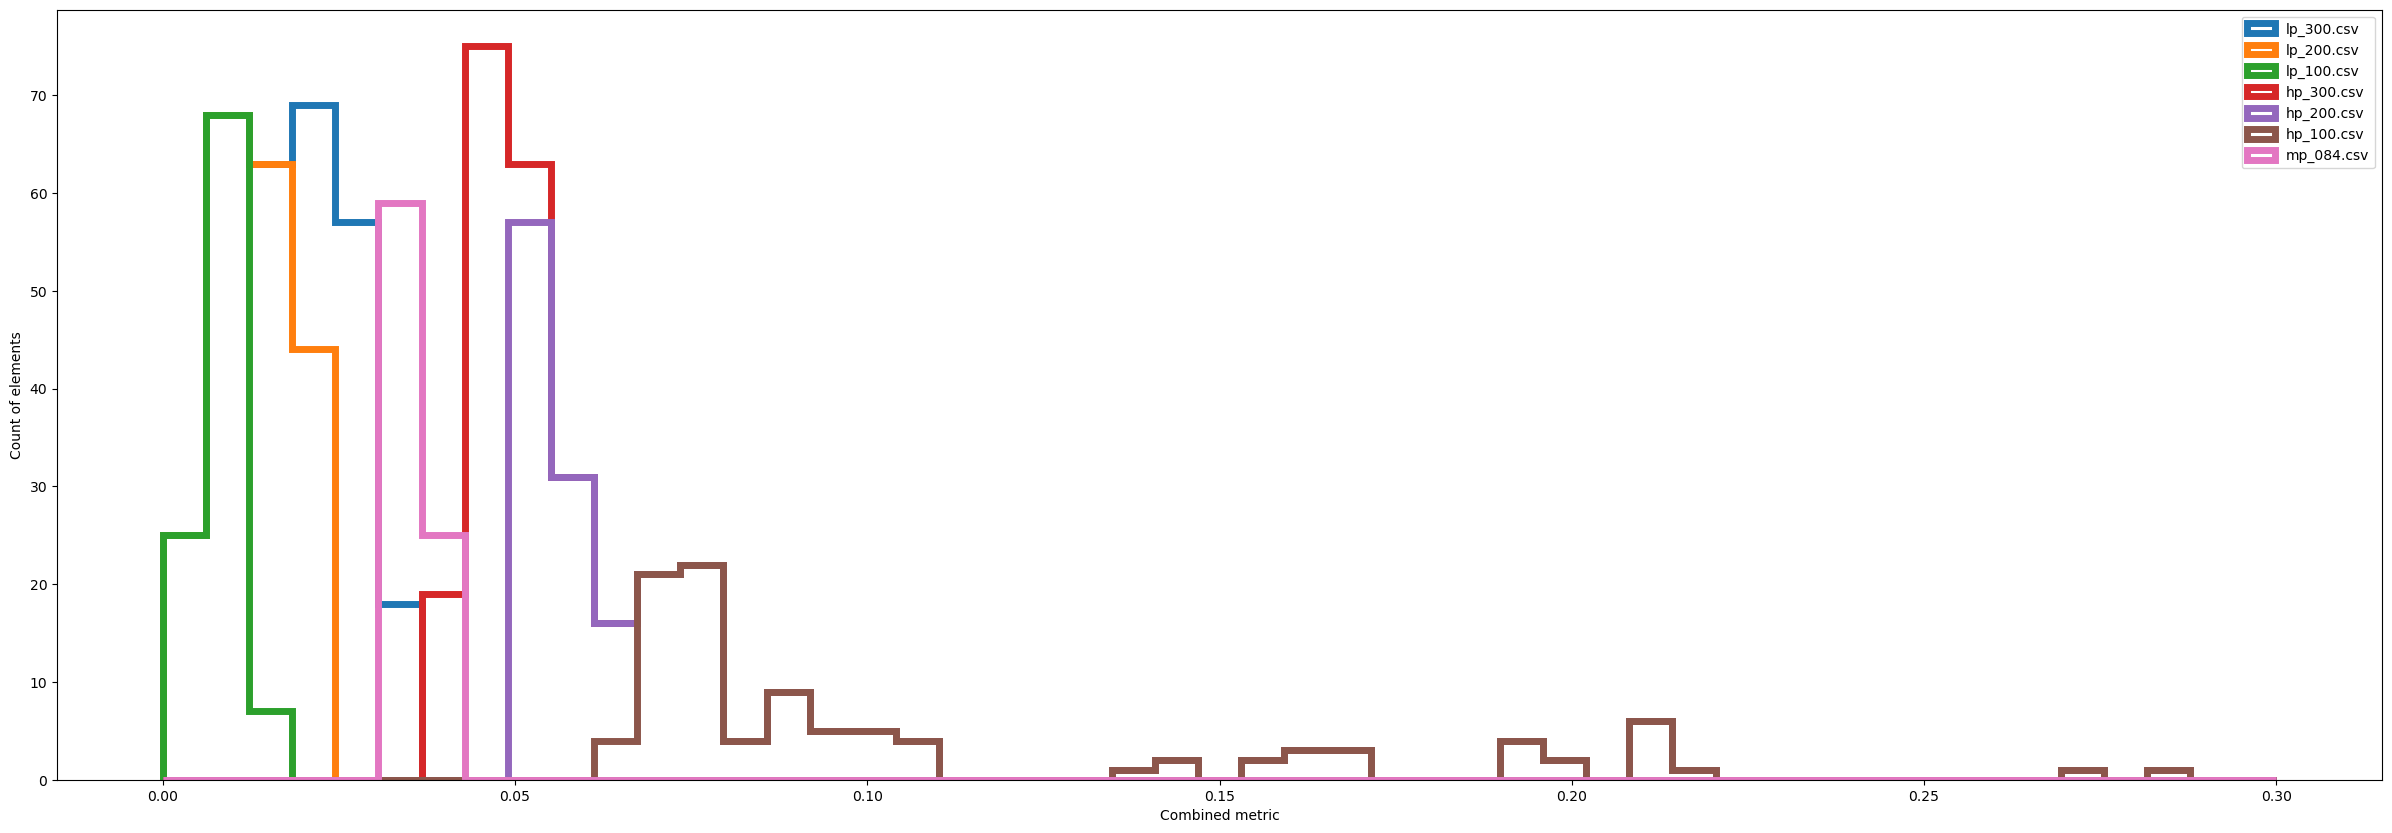

In [3]:
fig, ax = plt.subplots(figsize=(30,10))

df_list = [    
    "lp_300.csv",
    "lp_200.csv",
    "lp_100.csv",
    "hp_300.csv",
    "hp_200.csv",
    "hp_100.csv",
    "mp_084.csv",]

bins = np.linspace(0,30)/100

#[0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30]

for df in df_list:
    my_df = pd.read_csv(df)
    
    # Print out number of lines in the selected points:
    print(df+"---"+str(np.shape(my_df)))
    
    ax.hist(my_df['combined.metric_avg'], bins=bins, histtype='step', linewidth=5)
    
    # Print out the number of lines in the data ready for training:
    # (this should match the above)
    my_df = pd.read_csv(df+".out")
    print(df+".out---"+str(np.shape(my_df)))
    
    # Check that the same Sample_ID are present in both the .csv and .csv.out
    # by running cross_check_training_files.csh.
    
ax.legend(df_list)
ax.set_xlabel('Combined metric')
ax.set_ylabel('Count of elements')

In [4]:
# Write out a medium priority file without the target and with exactly the necessary
# format for compatibility with ICON-ModEx_Collaborator_Site_Water_Chemistry_Data.csv
# -> necessary for ML workflow due to several small but important format changes!
my_df = pd.read_csv('mp_084.csv.out')

my_df.pop(
    'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment')

# There is a Site_ID column in the Nov-2023 data set for backtracing collaborator sampled sites (CM_*)
# Drop this for the purposes of predictions.
my_df.pop(
    'Site_ID')

# ML workflow expects 'Site_ID' as the column name.
my_df.rename(
    columns={"Sample_ID": "Site_ID"},
    inplace=True)

csv_cols=[
    'Site_ID',
    'Sample_Latitude',
    'Sample_Longitude',
    'Mean_DO_mg_per_L',
    'Mean_Temp_Deg_C',
    'pH']

my_df.to_csv(
    'mp_084.csv.out.collab', 
    mode='w',
    columns=csv_cols)